In [176]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
import re
import spacy
import string

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matthewcassi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/matthewcassi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/matthewcassi/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/matthewcassi/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [71]:
from collections import Counter, defaultdict

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

In [200]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [201]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [202]:
train.keyword.value_counts()

fatalities               45
armageddon               42
deluge                   42
harm                     41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [203]:
train.location.value_counts()

USA                             104
New York                         71
United States                    50
London                           45
Canada                           29
                               ... 
Northern Ireland                  1
Newton Centre, Massachusetts      1
Torrance, CA                      1
Also follow ?                     1
jeddah | Khartoum                 1
Name: location, Length: 3341, dtype: int64

In [204]:
train.shape

(7613, 5)

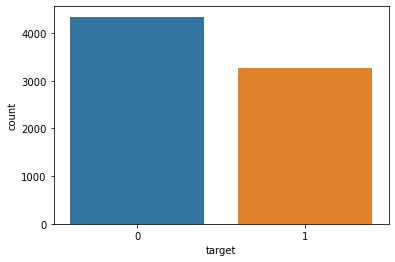

In [205]:
# Distribution of Disaster vs Non-Disaster
sns.countplot(train['target'])

In [10]:
train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [17]:
for i in np.arange(10):
     print(train.text[i])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Forest fire near La Ronge Sask. Canada
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
13,000 people receive #wildfires evacuation orders in California 
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
I'm on top of the hill and I can see a fire in the woods...
There's an emergency evacuation happening now in the building across the street
I'm afraid that the tornado is coming to our area...


In [206]:
# Calculate the lengths of the text
non_dis_len = train[train.target == 0]['text'].str.len()
dis_len = train[train.target == 1]['text'].str.len()

Text(0.5, 1.0, 'Disaster Tweets')

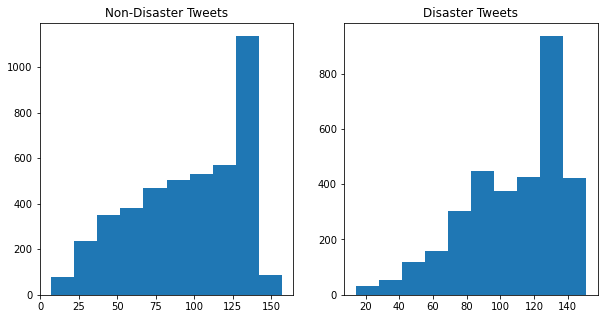

In [207]:
# plot the lengths of the text from each type disaster vs non-disaster
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(non_dis_len)
ax1.set_title("Non-Disaster Tweets")
ax2.hist(dis_len)
ax2.set_title("Disaster Tweets")

In [208]:
# Load the Spacy Model
nlp = spacy.load("en_core_web_sm")

In [209]:
# Count the number of words
disaster_words = train[train['target']==1]['text'].str.split().map(lambda x: len(x))
non_disaster_words = train[train['target']==0]['text'].str.split().map(lambda x: len(x))

Text(0.5, 1.0, 'Disaster Tweets')

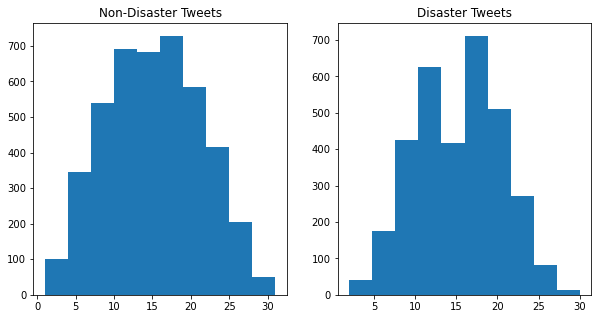

In [41]:
# Plot number of words for each type of tweet
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(non_disaster_words)
ax1.set_title("Non-Disaster Tweets")
ax2.hist(disaster_words)
ax2.set_title("Disaster Tweets")

In [63]:
def count_words(text):
    """ Counts the number of words using Spacy"""
    doc = nlp(text)
    count_words = 0
    # Iterate over the tokens in the doc
    for token in doc:
        # Check if the token resembles a word
        if token.is_alpha:
            count_words += 1
    return count_words

def count_numbers(text):
    """ Counts the number of numbers using Spacy"""
    doc = nlp(text)
    count_nums = 0
    # Iterate over the tokens in the doc
    for token in doc:
        # Check if the token resembles a word
        if token.like_num:
            count_nums += 1
    return count_nums

def count_punc(text):
    """ Counts the number of punctuation symbols using Spacy"""
    doc = nlp(text)
    count_punct = 0
    # Iterate over the tokens in the doc
    for token in doc:
        # Check if the token resembles a word
        if token.is_punct:
            count_punct += 1
    return count_punct

In [64]:
non_disaster = train[train.target == 0]['text'].to_list()
disaster = train[train.target == 1]['text'].to_list()

In [65]:
# Calculate number of words in each tweet using Spacy
nd_words = [count_words(text) for text in non_disaster]
d_words = [count_words(text) for text in disaster]

Text(0.5, 1.0, 'Disaster Tweets')

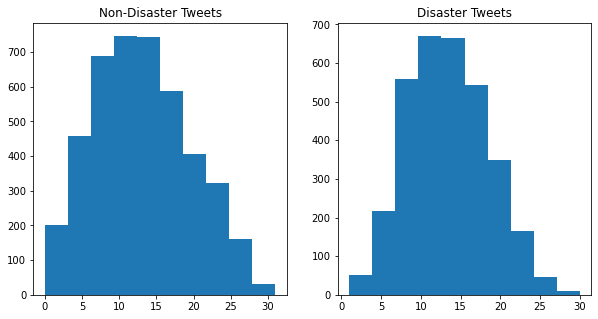

In [66]:
# Plot number of words based on Spacy calcs
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(nd_words)
ax1.set_title("Non-Disaster Tweets")
ax2.hist(d_words)
ax2.set_title("Disaster Tweets")

In [67]:
# Count number of numbers using Spacy
nd_nums = [count_numbers(text) for text in non_disaster]
d_nums = [count_numbers(text) for text in disaster]

Text(0.5, 1.0, 'Disaster Tweets')

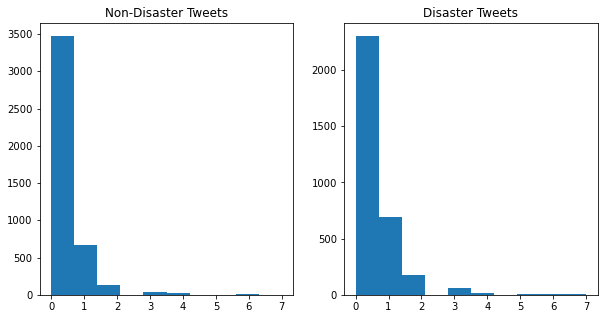

In [68]:
# Plot number of numbers
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(nd_nums)
ax1.set_title("Non-Disaster Tweets")
ax2.hist(d_nums)
ax2.set_title("Disaster Tweets")

In [69]:
# Calculate number of punctuation symbols
nd_puncts = [count_punc(text) for text in non_disaster]
d_puncts = [count_punc(text) for text in disaster]

Text(0.5, 1.0, 'Disaster Tweets')

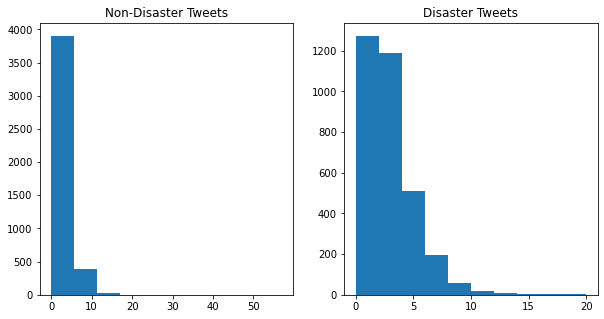

In [70]:
# Plot number of punctuation symbols
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.hist(nd_puncts)
ax1.set_title("Non-Disaster Tweets")
ax2.hist(d_puncts)
ax2.set_title("Disaster Tweets")

In [74]:
def get_ner(text):
    """ Get the named entities for each tweet"""
    doc = nlp(text)
    return [X.label_ for X in doc.ents]

In [84]:
# Get the named entities for non-disaster tweets
ent_nd = [get_ner(text) for text in non_disaster] 
ent_nd = [x for sub in ent_nd for x in sub]

In [81]:
# Get the named entities for disaster tweets
ent_d = [get_ner(text) for text in disaster] 
ent_d = [x for sub in ent_d for x in sub]

In [85]:
# Use counter to count the NERs
counter_d = Counter(ent_d)
count_d = counter_d.most_common(15)

counter_nd = Counter(ent_nd)
count_nd = counter_nd.most_common(15)

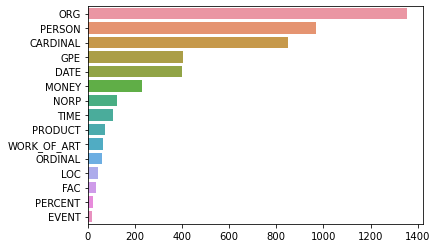

In [88]:
# Plot NERs for non-disaster
x, y = map(list, zip(*count_nd))
sns.barplot(x=y, y=x)

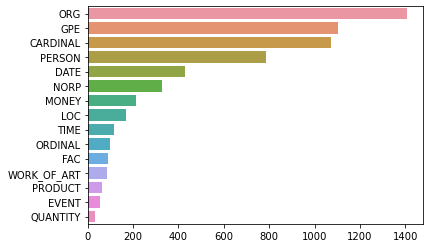

In [89]:
# Plot NERs for disaster
x, y = map(list, zip(*count_d))
sns.barplot(x=y, y=x)

In [177]:
def remove_URL(text):
    """Remove URLs from text"""
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_emoji(text):
    """Remove emojis from text"""
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    """Remove HTML from text"""
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)

In [178]:
# Initialize the Count Vectorizers for counting unigrams, bigrams, and trigrams
vec_unigram1 = CountVectorizer(stop_words = 'english', max_df = 0.9)
vec_bigram1 = CountVectorizer(stop_words = 'english', ngram_range = (2,2), max_df = 0.9)
vec_trigram1 = CountVectorizer(stop_words = 'english', ngram_range = (3,3), max_df = 0.9)

vec_unigram2 = CountVectorizer(stop_words = 'english', max_df = 0.9)
vec_bigram2 = CountVectorizer(stop_words = 'english', ngram_range = (2,2), max_df = 0.9)
vec_trigram2 = CountVectorizer(stop_words = 'english', ngram_range = (3,3), max_df = 0.9)

In [179]:
# Create dataframes for countvectorizers
disaster_df = train[train.target == 1]
non_disaster_df = train[train.target == 0]

In [180]:
# Clean text: remove URLs, remove emojis, remove HTML
disaster_df['text_clean'] = disaster_df['text'].apply(lambda x: remove_URL(x))
disaster_df['text_clean'] = disaster_df['text_clean'].apply(lambda x: remove_emoji(x))
disaster_df['text_clean'] = disaster_df['text_clean'].apply(lambda x: remove_html(x))

In [181]:
# Clean text: remove URLs, remove emojis, remove HTML
non_disaster_df['text_clean'] = non_disaster_df['text'].apply(lambda x: remove_URL(x))
non_disaster_df['text_clean'] = non_disaster_df['text_clean'].apply(lambda x: remove_emoji(x))
non_disaster_df['text_clean'] = non_disaster_df['text_clean'].apply(lambda x: remove_html(x))

In [182]:
# Fit the unigram vectorizer
bow_disaster = vec_unigram1.fit_transform(disaster_df.text_clean)
sum_bow_disaster = bow_disaster.sum(axis=0)

In [183]:
# Count unigrams
words_freq_disaster = [(word, sum_bow_disaster[0, idx])
                       for word, idx in vec_unigram1.vocabulary_.items()]
words_freq_disaster = sorted(words_freq_disaster, key=lambda x: x[1], reverse=True)

In [184]:
# Fit the unigram vectorizer
bow_non_disaster = vec_unigram2.fit_transform(non_disaster_df.text_clean)
sum_bow_non_disaster = bow_non_disaster.sum(axis=0)

In [185]:
# Count unigrams
words_freq_non_disaster = [(word, sum_bow_non_disaster[0, idx])
                       for word, idx in vec_unigram2.vocabulary_.items()]
words_freq_non_disaster = sorted(words_freq_non_disaster, key=lambda x: x[1], reverse=True)

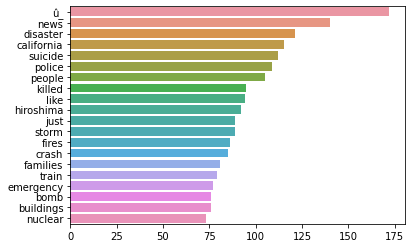

In [186]:
# Plot disaster unigrams
x, y = map(list, zip(*words_freq_disaster[:20]))
sns.barplot(x=y, y=x)

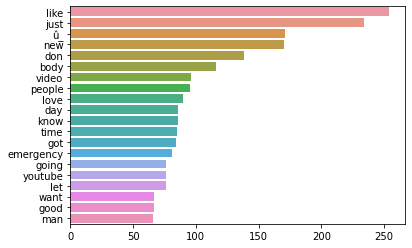

In [187]:
# Plot non-disaster unigrams
x, y = map(list, zip(*words_freq_non_disaster[:20]))
sns.barplot(x=y, y=x)

In [188]:
bow_disaster = vec_bigram1.fit_transform(disaster_df.text_clean)
sum_bow_disaster = bow_disaster.sum(axis=0)

In [189]:
words_freq_disaster = [(word, sum_bow_disaster[0, idx])
                       for word, idx in vec_bigram1.vocabulary_.items()]
words_freq_disaster = sorted(words_freq_disaster, key=lambda x: x[1], reverse=True)

In [190]:
bow_non_disaster = vec_bigram2.fit_transform(non_disaster_df.text_clean)
sum_bow_non_disaster = bow_non_disaster.sum(axis=0)

In [191]:
words_freq_non_disaster = [(word, sum_bow_non_disaster[0, idx])
                       for word, idx in vec_bigram2.vocabulary_.items()]
words_freq_non_disaster = sorted(words_freq_non_disaster, key=lambda x: x[1], reverse=True)

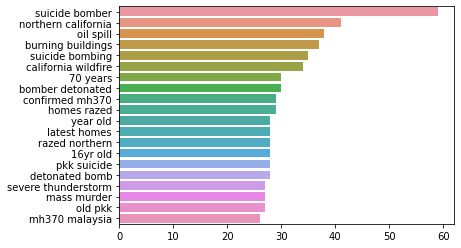

In [192]:
x, y = map(list, zip(*words_freq_disaster[:20]))
sns.barplot(x=y, y=x)

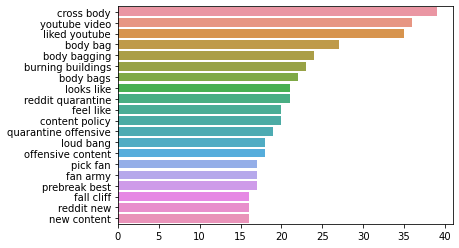

In [193]:
x, y = map(list, zip(*words_freq_non_disaster[:20]))
sns.barplot(x=y, y=x)

In [194]:
bow_disaster = vec_trigram1.fit_transform(disaster_df.text_clean)
sum_bow_disaster = bow_disaster.sum(axis=0)

In [195]:
words_freq_disaster = [(word, sum_bow_disaster[0, idx])
                       for word, idx in vec_trigram1.vocabulary_.items()]
words_freq_disaster = sorted(words_freq_disaster, key=lambda x: x[1], reverse=True)

In [196]:
bow_non_disaster = vec_trigram2.fit_transform(non_disaster_df.text_clean)
sum_bow_non_disaster = bow_non_disaster.sum(axis=0)

In [197]:
words_freq_non_disaster = [(word, sum_bow_non_disaster[0, idx])
                       for word, idx in vec_trigram2.vocabulary_.items()]
words_freq_non_disaster = sorted(words_freq_non_disaster, key=lambda x: x[1], reverse=True)

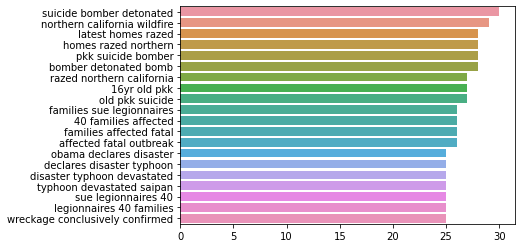

In [198]:
x, y = map(list, zip(*words_freq_disaster[:20]))
sns.barplot(x=y, y=x)

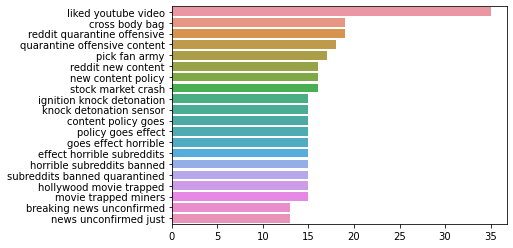

In [199]:
x, y = map(list, zip(*words_freq_non_disaster[:20]))
sns.barplot(x=y, y=x)